#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/SalariesX.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency'],
      dtype='object')

 # Task 1. **Basic Data Exploration**

In [3]:
df.shape

(148654, 12)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 13.6+ MB


In [5]:
missing_values = df.isnull().sum()
missing_values

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
dtype: int64

#Task 2.  **Descriptive Statistics**

In [6]:
mean_salary = df['TotalPay'].mean()

median_salary = df['TotalPay'].median()

mode_salary = df['TotalPay'].mode().values[0]

min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()

print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)
print("Mode Salary:", mode_salary)
print("Minimum Salary:", min_salary)
print("Maximum Salary:", max_salary)

Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43


In [7]:
salary_range = max_salary - min_salary
print("Salary Range:", salary_range)


Salary Range: 568213.56


In [8]:
std_deviation = df['TotalPay'].std()
print("Standard Deviation of Salary:", std_deviation)

Standard Deviation of Salary: 50517.00527394987


# Task 3. **Data Cleaning**

In [9]:
# BasePay       null values number = 606
# replace null values with minimum TotalPay
df['BasePay'].fillna(min_salary, inplace=True)

In [10]:
# OvertimePay       null values number = 1
# replace null values with 0
df['OvertimePay'].fillna(0, inplace=True)

In [11]:
# OtherPay          null values number = 1
# replace null values with 0
df['OtherPay'].fillna(0, inplace=True)

In [12]:
# Benefits          null values number = 36160
# replace null values with 0
df['Benefits'].fillna(0, inplace=True)

In [13]:
# TotalPay           null values number = 1
# replace null values with sum of (BasePay OvertimePay OtherPay Benefits)
df['TotalPay'].fillna(df['BasePay']+df['OvertimePay']+df['OtherPay']+df['Benefits'], inplace=True)

In [14]:
# TotalPayBenefits       null values number = 1
# replace null values with sum of (BasePay OvertimePay OtherPay Benefits)
df['TotalPayBenefits'].fillna(df['TotalPay'], inplace=True)

In [15]:
# TotalPayBenefits       null values number = 1
# replace null values with sum of (BasePay OvertimePay OtherPay Benefits)
df['TotalPayBenefits'].fillna(df['TotalPay'], inplace=True)

In [16]:
# Notes               all null i will drop this culomn
df.drop('Notes', axis=1, inplace=True)

In [17]:
# year         null value number = 1
# i will put it like previous value
df.fillna(method='ffill', inplace=True)

In [18]:
# Agency         null value number = 1
#i put it San Francisco like all table values
df['Agency'].fillna('San Francisco', inplace=True)

In [19]:
missing_values = df.isnull().sum()
missing_values

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

#Task 4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

In [20]:
jobtitle_counts = df['Agency'].value_counts()
jobtitle_counts

San Francisco    148654
Name: Agency, dtype: int64

In [21]:
import matplotlib.pyplot as plt


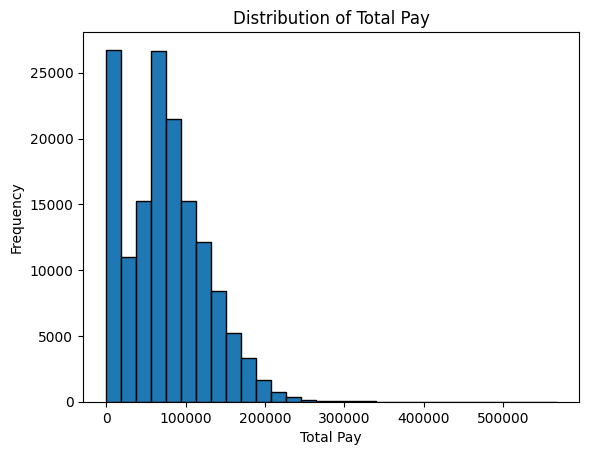

In [22]:
plt.hist(df['TotalPay'], bins=30, edgecolor='black')

plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.title('Distribution of Total Pay')

plt.show()

In [23]:
pay_counts = df['TotalPay'].value_counts()
pay_counts

 0.00         368
 18594.00      82
 123290.70     56
 132242.50     49
 105489.00     42
             ... 
 83836.25       1
 83710.91       1
 83283.97       1
 83425.21       1
-618.13         1
Name: TotalPay, Length: 138486, dtype: int64

#Task 5. **Grouped Analysis**

In [24]:
summary_stats = df.groupby('Year')['TotalPay'].mean()

print(summary_stats)

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64


#Task 6. **Simple Correlation Analysis**

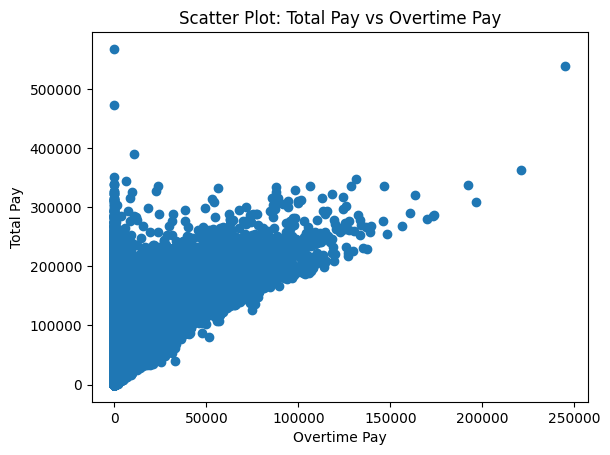

Correlation coefficient: 0.5048602762311212


In [25]:
correlation = df['TotalPay'].corr(df['OvertimePay'])

plt.scatter(df['OvertimePay'], df['TotalPay'])
plt.xlabel('Overtime Pay')
plt.ylabel('Total Pay')
plt.title('Scatter Plot: Total Pay vs Overtime Pay')

plt.show()

print('Correlation coefficient:', correlation)

#Task 7. **Summary of Insights**



*   From the analysis of the groups, I presented the salary according to the years. We notice that the rate of salary increased with the progression of the years .
*   From the correlation plot between TotalPay and OvertimePay, as OvertimePay increases, TotalPay increases .

